<a href="https://colab.research.google.com/github/Urvi-M/BE559/blob/main/Homework1_part2_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1.2 (34 points)

**Learning objectives:**

In this assignment, we will refine our python skills and delve into hypothesis testing.  We will explore:

*   Sampling
*   Sample statistics and their distributions
*   The t distribution and t-test

**NOTE:**  Include axis labels in all plots!

---
## Part 1 (2 points)

Load the same libraries that we used in *Homework 1.1*.

*   `numpy` (as `np`)

*   `matplotlib.pyplot` (as `plt`)

*   `scipy.stats` (as `stats`)

Now is also a good time to set the default font size to 16.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.rcParams.update({'font.size': 16})

---
## Part 2 (2 points)

*   Load the same height and weight data taken from 25,000 18-year-olds as in *Homework 1.1*.  These data are stored in a .csv (comma separated values) file at the following URL:

   https://raw.githubusercontent.com/BU-BME-DataSci-ML/Spring-2023/main/Homework1/SOCR-HeightWeight.csv

   Use the `genfromtxt` function in numpy (i.e. `np.genfromtxt`) to load the data directly from this URL into a variable called `HeightsAndWeights`.  

*   Make an easy-to-use variable called `heights` form the second column of `HeightsAndWeights`

In [18]:
HeightsAndWeights = np.genfromtxt('https://raw.githubusercontent.com/BU-BME-DataSci-ML/Spring-2023/main/Homework1/SOCR-HeightWeight.csv',delimiter=',',skip_header=1)


---
## Part 3 (2 points)

Suppose we measure the heights of three students taking BE 700 to be 70.5", 72", and 68".

*   Create a numpy array containing these values called `classHeights`.
*   Print the array



In [19]:
#HeightsAndWeights
heights = HeightsAndWeights[:,1]
weights = HeightsAndWeights[:,2]
classHeights = [70.5,72,68]
meanHeight = np.mean(heights)
stdHeight = np.std(heights)

---
## Part 4 (2 points)

Visualize our measurements (`classHeights`) and the distribution of the reference data (`heights`) on the same axis.

*   Create a normal random variable with the same mean and standard deviation as the `heights` dataset and call it `heightDist`.

*   Plot the probability density function (PDF) of `heightDist` over the relevant range of heights.

*   On the same axes, plot a histogram of `classHeights`.  Set  `density=True` and `alpha=0.2`.  For this histogram, set the bin edges explicitly as `bins=np.arange(60, 74)` so that each bin has a width of 1 inch

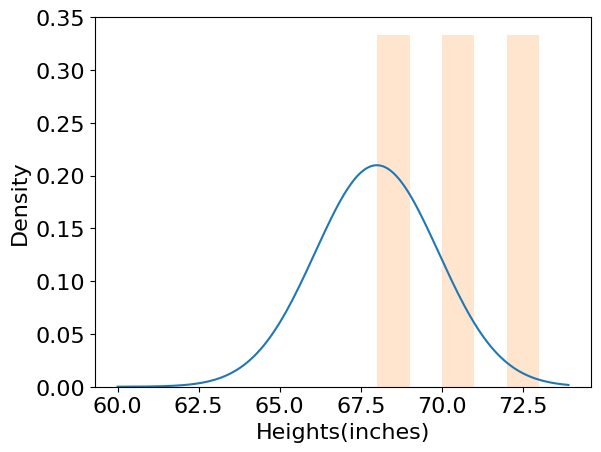

In [20]:
heightDist = stats.norm(meanHeight,stdHeight)
x= np.arange(60,74,0.1)
pdf = heightDist.pdf(x)
plt.plot(x,pdf)
plt.hist(classHeights,bins=np.arange(60, 74),density=True,alpha=0.2)
plt.xlabel('Heights(inches)')
plt.ylabel('Density')
plt.show()

---
##Step 5 (2 points)

Calculate some descriptive statistics and print them.

*   Mean value of `heights`

*   Mean value of `classheights`

*   Standard deviation of values in `heights`

*   Standard deviation of values in `classHeights`

Display them as below:

In [21]:
meanHeight = np.mean(heights)
meanclassHeight = np.mean(classHeights)
stdHeight = np.std(heights)
stdclassHeight = np.std(classHeights)
print(f'Mean height in dataset = {meanHeight:.2f} inches')
print(f'Mean height in class = {meanclassHeight:.2f} inches\n')
print(f'Standard deviation of heights in dataset = {stdHeight:.2f} inches')
print(f'Standard deviation of heights in class = {stdclassHeight:.2f} inches')

Mean height in dataset = 67.99 inches
Mean height in class = 70.17 inches

Standard deviation of heights in dataset = 1.90 inches
Standard deviation of heights in class = 1.65 inches


---
##Part 6 (2 points)

*   z-score `classHeights` using the mean and standard deviation of `heights`.  Call this variable `ZclassHeights`.
*   Plot a histogram of `ZclassHeights`.
*   Overlay the PDF of the standard normal distribution.

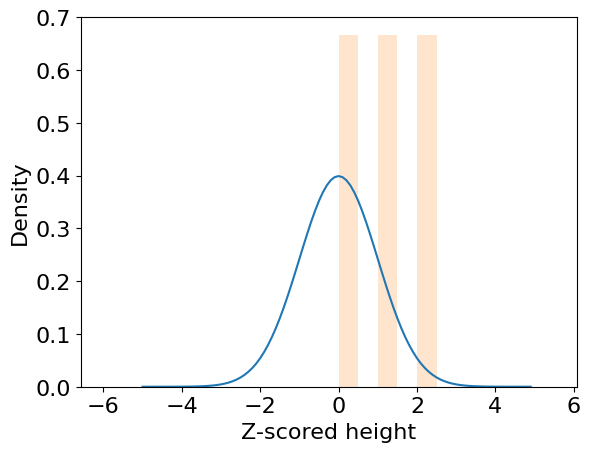

In [22]:
ZclassHeights = (classHeights-meanHeight)/stdHeight
x=np.arange(-5,5,0.1)
zDist = stats.norm(0, 1)
pdf = zDist.pdf(x)
plt.plot(x,pdf)
plt.hist(ZclassHeights,bins=np.arange(-6,6,0.5),density=True,alpha=0.2)
plt.xlabel('Z-scored height')
plt.ylabel('Density')
plt.show()

---
##Part 7 (2 points)

Let's start to do some more rigorous comparisons of our sample data (`classHeights`) and our reference dataset (`heights`).  

First, consider the mean of our sample data.  

*   Calculate the z-score of the mean and print it.  

In [23]:
z= (meanclassHeight-meanHeight)/stdHeight
print(f'Z-scored mean height = {meanHeight:.2f}')

Z-scored mean height = 67.99


The mean of these measurements is well within the reference distribution of heights.

---
##Part 8 (2 points)

Where does the z-score of the sample mean fall within the standard normal distribution?

*   Plot the CDF of the standard normal distribution and display the location of the sample mean as a red dot with `markersize=20`.

*   Calculate the value of the CDF at the location of the sample mean and display this value.  
*   What percent of the standard normal distribution is as large or larger than the sample mean?  Print this value.

87.35% of the standard normal distribution lies to the right of the sample mean


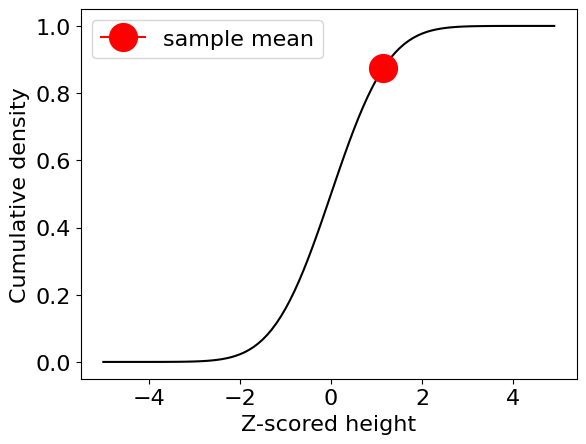

In [31]:
cdf=zDist.cdf(x)
print(f'{cdfc:.2%} of the standard normal distribution lies to the right of the sample mean')
plt.plot(x,cdf,color= 'k')
cdfc = heightDist.cdf(meanclassHeight)
plt.plot(z,cdfc,marker="o",markersize =20,color= 'r', label='sample mean')
plt.xlabel('Z-scored height')
plt.ylabel('Cumulative density')
plt.legend()
plt.show()

Does this tell us the likelihood of drawing a sample from the reference dataset of 18-year-old heights that has this mean?  

NO!  

Why?  The distribution of the `heights` data is different than the distribution of the means of random samples drawn from those data.

The mean of our sample is our **sample statistic**.  So what is the distribution of this sample statistic, if not the distribution from which we drew the samples?  Let's try to find out!

First, we'll randomly select samples from `heights` with the same number of elements as `classHeights` and find out empirically what the distribution of the sample means should look like.

*   Draw a random sample from `heights` with the same number of elements as `classHeights` and find the mean. You can draw random samples from an array using `np.random.choice`.  
*   Calculate the mean of this random sample and z-score it.

In [32]:
r=np.random.choice(heights,3)
rmean=np.mean(r)
rz=(rmean-meanHeight)/stdHeight
print(f'Mean of random sample = {rmean:.2f} inches')
print(f'Z-scored mean = {rz:.2f}')

Mean of random sample = 68.31 inches
Z-scored mean = 0.17


---
##Part 9 (2 points)

OK, now that we know how to draw random samples, we'll use this to gain some intuition about the values that we expect sample means to take.

*   Repeat this calculation 5000 times using a `for` loop and store the random sample means as a numpy array.

*   Plot a histogram of the random sample means.

*   Overlay the PDF of the normal distribution with the mean and standard deviation of `heights`.

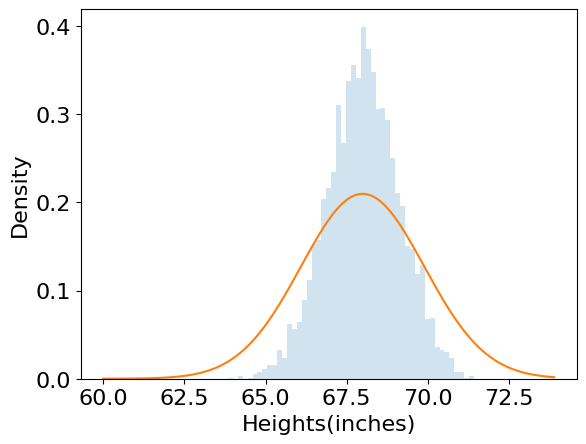

In [26]:
Rmean=np.zeros(5000)
for i in range(5000):
  r=np.random.choice(heights,3)
  Rmean[i]=np.mean(r)
plt.hist(Rmean,bins=50,density =True,alpha=0.2)
heightDist = stats.norm(meanHeight,stdHeight)
x= np.arange(60,74,0.1)
pdf = heightDist.pdf(x)
plt.plot(x,pdf)
plt.xlabel('Heights(inches)')
plt.ylabel('Density')
plt.show()

These look different!   

This is the **central limit theorem** in action!  

To recall, if we calculate the mean of a sample of random variables

$\displaystyle {\bar {X}}_{n}\equiv {\frac {X_{1}+\cdots +X_{n}}{n}}$

the distribution of sample means is a normal distribution with mean, ${\mu}$, and standard deviation, ${\frac{\sigma}{\sqrt {n}}}$.  Here $ n $ is the size of the random sample and ${\sigma}$ is the standard deviation of the population.

The width of this distribution is the standard error of the measurement of the mean, ${\frac{\sigma}{\sqrt {n}}}$, rather than the standard deviation of the population,
${\sigma}$.

---
##Part 10 (2 points)

Let's see if this prediction holds true.

*   Plot the histogram of sample means.

*   Overlay the PDF of a normal distribution with the mean, ${\mu}$, and standard deviation, $\sigma$, of the `heights` data, as above.

*   Finally, overlay the PDF of a normal distribution with mean, ${\mu}$, and standard deviation , ${\frac{\sigma}{\sqrt {n}}}$.


3


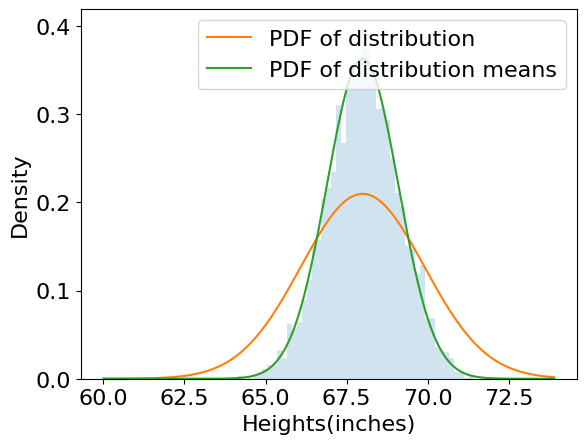

In [27]:
n=3
print(n)
N=np.sqrt(n)
plt.hist(Rmean,bins=50,density =True,alpha=0.2)
heightDist = stats.norm(meanHeight,stdHeight)
heightDistn = stats.norm(meanHeight,stdHeight/N)
x= np.arange(60,74,0.1)
pdf = heightDist.pdf(x)
pdfn = heightDistn.pdf(x)
plt.plot(x,pdf,label ='PDF of distribution')
plt.plot(x,pdfn,label ='PDF of distribution means')
plt.xlabel('Heights(inches)')
plt.ylabel('Density')
plt.legend()
plt.show()

---
##Part 11 (2 points)

OK!  Let's re-examine where our measurement falls in this new distribution - the distribution of means of random samples of this size (N=3) drawn from the `heights` dataset.

*   Plot the PDF of the distribution you found in **Part 10**.

*   Now plot where the mean of `classHeights` falls in this distribution as a red dot.

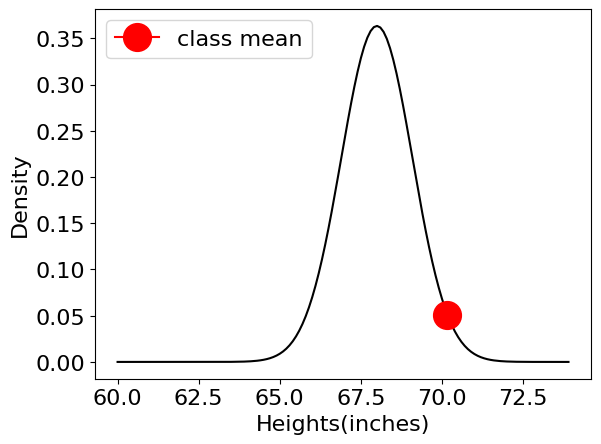

In [28]:
plt.plot(x,pdfn,color='k')
pdfc = heightDistn.pdf(meanclassHeight)
plt.plot(meanclassHeight,pdfc,marker="o",markersize =20,color= 'r', label='class mean')
plt.xlabel('Heights(inches)')
plt.ylabel('Density')
plt.legend()
plt.show()

---
##Part 12 (2 points)

Now, calculate the probability that the mean of classHeights is as large or larger than the measured value.  Do this two ways:

*   **Method 1 (Monte Carlo):** Directly find the proportion of random sample means  larger than the class sample mean.  This is the estimated probability of drawing a sample from `heights` with a mean as large (or larger) than the mean of `classHeights`.

*   **Method 2 (analytical):** Use the cdf of the normal distribution with the same mean as `heights` and standard deviation equal to ${\frac{\sigma}{\sqrt {n}}}$ (the predicted distribution of sample means) to determine the probability of measuring a set of class heights with this mean.



In [29]:
method1 = np.sum(Rmean >= meanclassHeight)/np.size(Rmean)
method2=1-heightDistn.cdf(meanclassHeight)
print(f'Probability (Monte Carlo) = {method1:.2%} chance')
print(f'Probability (analytical) = {method2:.2%} chance')

Probability (Monte Carlo) = 2.44% chance
Probability (analytical) = 2.39% chance


These probabilities may not be exactly th same, but if you increased the number of random samples drawn in **Part 9**, then these values would eventually converge.

---
##Part 13 (2 points)

This is great!  But we still haven't *quite* gotten to where we need to be.

Why? In this case, we are comparing against a reference datset with a huge number of measurements, and we can estimate the population mean and standard deviation from these data with very high accuracy.  But this is not usually the case!

Instead, lets consider a slightly different scenario:

**Problem:**  What is the probability that our classHeights data were drawn from a normal distribution with mean of 67.99 (the mean of `heights`), when all we have is our measurements?

Importantly, now we do not know the expected standard deviation of a sample of size N, because we don't know the standard deviation of values in the the whole population.  All we have is the standard deviation of our measurements, which we could use as an imperfect estimate of the standard deviation of the population.

This is where the **'t' distribution** and **t tests** come in.  We've seen that the z statistic:

${\displaystyle {z = \frac {{\bar {X}}-\mu }{\sigma /{\sqrt {n}}}}}$

follows the standard normal distribution.  But we often don't know $\sigma$.  Instead, we can calculate a related statistic, the **t statistic:**

${\displaystyle {t = \frac {{\bar {X}}-\mu }{S/{\sqrt {n}}}}}$

Where S is the **sample** standard deviation, which we can calculate directly from our sample data (`classHeights`).  The PDF of the t distribution is given by:

$f(t)={\frac {\Gamma ({\frac {\nu +1}{2}})}{{\sqrt {\nu \pi }}\,\Gamma ({\frac {\nu }{2}})}}\left(1+{\frac {t^{2}}{\nu }}\right)^{-(\nu +1)/2} $

We won't derive this equation, but it is important to point out that it is parameterized by a single number, the degrees of freedom of the distribution, $\nu$.

That is, the t distribution has a shape that depends only on this parameter.  

Here, the degrees of freedom is typically equal to the number of observations minus one $(n-1)$, for reasons that we will discuss in class.

On the same axes, plot:
*   The PDF of the standard normal distribution
*   The PDF of the t distribution (`stats.t`) with the appropriate dof for the `classHeights` data
*   Include a legend.

In both cases, use `scipy.stats` to find the PDF.


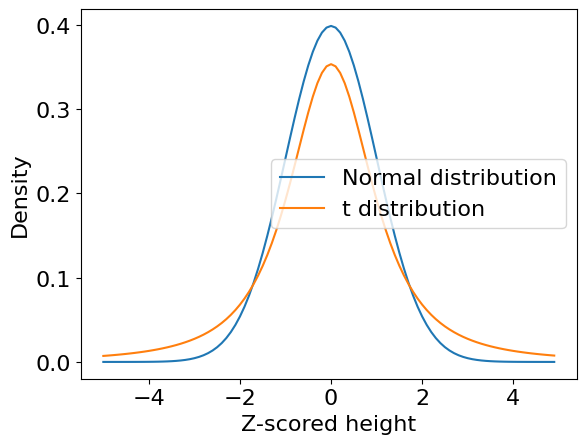

In [33]:
dof= n-1
x=np.arange(-5,5,0.1)
zDist = stats.norm(0, 1)
tDist = stats.t(dof)
pdf = zDist.pdf(x)
pdft =tDist.pdf(x)
plt.plot(x,pdf, label = 'Normal distribution')
plt.plot(x,pdft,label ='t distribution')
plt.xlabel('Z-scored height')
plt.ylabel('Density')
plt.legend(loc ='right')
plt.show()

---
##Part 14 (2 points)
Examine the shape of the t distribution for different degrees of freedom compared to the standard normal distribution

*   Use `scipy.stats` to generate t distributions with dof= 2, 4, 8, 16, 32.
*   Plot the PDFs on the same axes and label them.
*   On the same axes, plot the standard normal distribution as a black line with `linewidth=2`

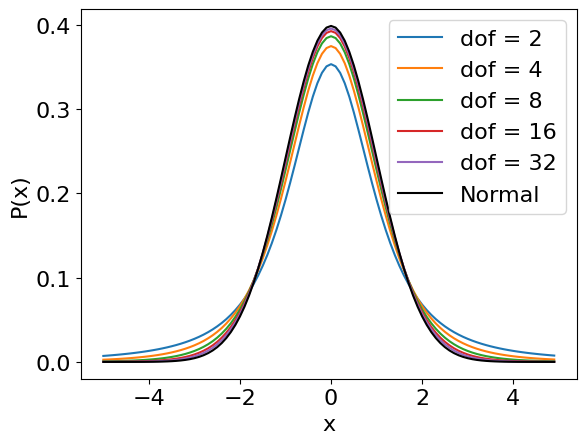

In [36]:
dof = [2,4,8,16,32]
for i in range(5):
  tDist = stats.t(dof[i])
  pdft =tDist.pdf(x)
  plt.plot(x,pdft,label =f'dof = {dof[i]}')

pdf = zDist.pdf(x)
plt.plot(x,pdf, color ='k',label = 'Normal')

plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend(loc='upper right')
plt.show()

You should see that the t distribution coverges to the stanadard normal distribution as the number of observations (degrees of freedom) increases as the sample standard deviation becomes a better and better estimate of the population standard deviation.

---
##Part 15 (2 points)
*   Repeat **Part 9**, but instead of calculating the z statistic for each random sample, compute the t statistic.  To calculate S appropriately, you will need to use `np.std` and set the option `ddof=1` (essentially dividing by `n-1` instead of `n`). This will give you an unbiased estimate of the population standard deviation.
*   Plot a histogram of these t statistics.
*   Overlay the standard normal distribution and the t distribution with the appropriate degrees of freedom.


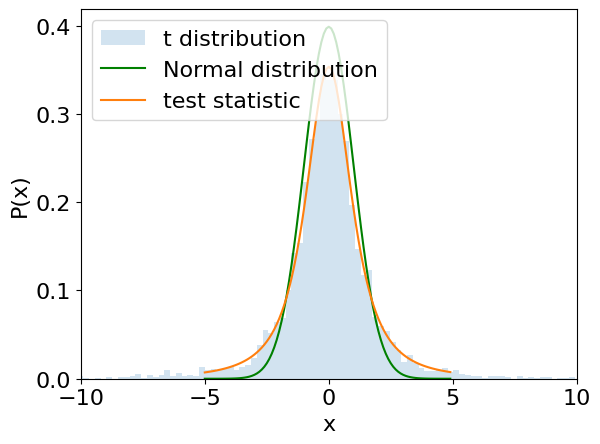

In [38]:
tstat=np.zeros(5000)
Rmean=np.zeros(5000)

for i in range(5000):
  r=np.random.choice(heights,3)
  S=np.std(r,ddof=1)
  Rmean[i]=np.mean(r)
  tstat[i]=(Rmean[i]-meanHeight)/(S/np.sqrt(np.size(classHeights)))
plt.hist(tstat,bins=500,density =True,alpha=0.2, label ='t distribution')
pdf = zDist.pdf(x)
plt.plot(x,pdf, color ='g',label = 'Normal distribution')
tDist = stats.t(2)
pdft = tDist.pdf(x)
plt.plot(x,pdft,label ='test statistic')
plt.xlim(-10,10)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend(loc='upper left')
plt.show()

Great!  Now you should see that the histogram of t statistics you calculated by randomly sampling `heights` matches the t distribution.

The t distribution and normal distribution look somewhat similar, even when the degrees of freedom is low, but the t distribution has much 'heavier' tails - more extreme values are much more likely to be observed by chance.

---
## Part 16 (2 points)

*   Now, calculate the t statistic for `classHeights` and print it.

Determine the probability of drawing a random sample from `heights` with a t statistic at least as large as you measured.  As, before, do this two ways:

*   **Method 2 (Monte Carlo):** Directly find the proportion of random sample t statistics larger than the class sample t statistic.  This is the estimated probability of drawing a sample with a mean as large (or larger) than the mean of `classHeights` when the population standard deviation is not known *a priori*.  To calculate S appropriately, you will need to use `np.std` and set the option `ddof=1` (essentially dividing by `n-1` instead of `n`).  This will give you an unbiased estimate of the population standard deviation.

*   **Method 1 (analytical):** Find the value of the CDF of the t distribution (with the correct degrees of freedom) at the measured t value using `scipy.stats`.  

In both cases, the value calculated - the probability of drawing a random sample from `heights` with a mean (and t statistic) at least as large as the observed value - is the p-value associated with the test.



In [63]:
tstatclass=(meanclassHeight-meanHeight)/(S/np.sqrt(np.size(classHeights)))
print(f't statistic = {tstatclass:.2f}')
method1=1-tDist.cdf(tstatclass)
method2=np.sum(tstat>= tstatclass)/np.size(tstat)
print(f'Probability (Monte Carlo) = {method2:.2%}')
print(f'Probability (analytical) = {method1:.2%}')

t statistic = 3.88
Probability (Monte Carlo) = 2.58%
Probability (analytical) = 3.02%


---
##Part 17 (2 points)

Finally, let's run some t-tests using `scipy.stats`.  

*   **Step 1:** Use the `stats.ttest_ind` function to find the probability that  `classHeights` is drawn from a normal distribution with the mean and standard deviation of the `heights` dataset using a two-sample t test.  Set `equal_var=True` and `alternative=greater` to run a one-sided test.  What is the p-value for this test?

*   **Step 2:** Use the `ttest_1samp` function to find the probability that the measured `classHeights` are drawn from a normal distribution with a mean value equal to 66.99" (the mean of `heights`).  What is the p-value for this test?

In [61]:
step1= stats.ttest_ind(classHeights,heights,equal_var=True,alternative ='greater')
step2 =stats.ttest_1samp(classHeights,popmean=meanHeight)
print(f'p-value #1: {step1.pvalue:.4f}')
print(f'p-value #2: {step2.pvalue:.4f}')

p-value #1: 0.0239
p-value #2: 0.2035


These values should match the probabilities you found in **Part 12** and **Part 16**!

Here, we are performing two different kinds of t tests that make different assumptions.  That they produce two different results is a explained by the fact that these tests have different levels of statistical power.  We'll explore this concept more in *Homework 1.3*!
